# To cheacking number of images and labels

In [2]:
import os
from PIL import Image


# Check a few images and labels
train_image_dir = r'D:\E\Delet\data2\train\images/'
train_label_dir = r'D:\E\Delet\data2\train/labels'

# Verify that images and labels match
image_files = os.listdir(train_image_dir)
labels_files = os.listdir(train_label_dir)

print(f"Number of training images: {len(image_files)}")
print(f"Number of training labels: {len(labels_files)}")

Number of training images: 618
Number of training labels: 620


In [5]:
# To find out extra files
import os

# Define the directories
train_image_dir = r'D:\E\Delet\data2\train\images/'
train_label_dir = r'D:\E\Delet\data2\train\labels/'

# List all files in the directories
image_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)

# Remove file extensions to compare filenames without extensions
image_files_base = {os.path.splitext(f)[0] for f in image_files}
label_files_base = {os.path.splitext(f)[0] for f in label_files}

# Find labels that do not have corresponding images
extra_labels = label_files_base - image_files_base

# Get the full filenames of the extra labels
extra_label_files = [f for f in label_files if os.path.splitext(f)[0] in extra_labels]

print(f"Number of training images: {len(image_files)}")
print(f"Number of training labels: {len(label_files)}")
print(f"Extra label files: {extra_label_files}")

Number of training images: 619
Number of training labels: 618
Extra label files: []


In [ ]:
Extra label files: ['224_ID53c.txt', '482_ID53c.txt']

# 

# Split ta data sets into train and test

In [6]:
import splitfolders

# Define the path to your dataset
dataset_path = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data'

# Split the dataset into train (70%) and val (30%)
splitfolders.ratio(dataset_path, output="D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data", seed=1337, ratio=(0.7, 0.3), group_prefix=None)

Copying files: 752 files [00:07, 102.59 files/s]


In [ ]:
# from ultralytics import YOLO

# model = YOLO('yolov8m-seg.pt')  # yolov8m-seg.pt, yolov8s.pt

# in this format result is better than bellow one Train the model
model.train(
    data='/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/config.yaml',
    epochs=150,  # Number of epochs
    imgsz=801,  # Image size
    batch=8,  # Batch size (adjust based on your GPU memory),  batch=16 lower batch provide more generalize details result
    lr0=0.01,  # Initial learning rate
    optimizer='auto',  # Optimizer
    device= 0,  # Use GPU = 0(set to 'cpu' if using CPU)
    workers=8,  # Number of data loading workers
    flipud=0.5,  # Vertical flip with a probability of 50%
    fliplr=0.5, # Horizontal flip with a probability of 50%
    degrees= 45.0,  # Rotation in degrees (±45 degrees)
    mosaic=1.0,  # Mosaic augmentation with a probability of 100%
    mixup=0.5,  # MixUp augmentation with a probability of 50%
    hsv_h=0.015,  # HSV hue augmentation
    hsv_s=0.7,  # HSV saturation augmentation
    hsv_v=0.4,  # HSV value augmentation
    translate=0.1,  # Translation
    scale=0.5,  # Scaling
    shear=2.0,  # Shear
    name='/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data2/train_150_bz8',  # Name of the run
    save_period=1,  # Save model every epoch
    cache=True  # Cache images for faster training
)

In [1]:
# predict inro mask tif file and create shp file from mask layer and deleat instantly
import os
import cv2
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
from ultralytics import YOLO  # Ensure you have the ultralytics package installed


C:\Users\maiti\miniconda3\envs\yolo\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



image 1/1 D:\E\Postdoc\RGB\Google\RGB\ID42\Tree_species\TIF\685_ID42.tif: 832x832 97 Trees, 7270.3ms
Speed: 17.8ms preprocess, 7270.3ms inference, 1432.7ms postprocess per image at shape (1, 3, 832, 832)


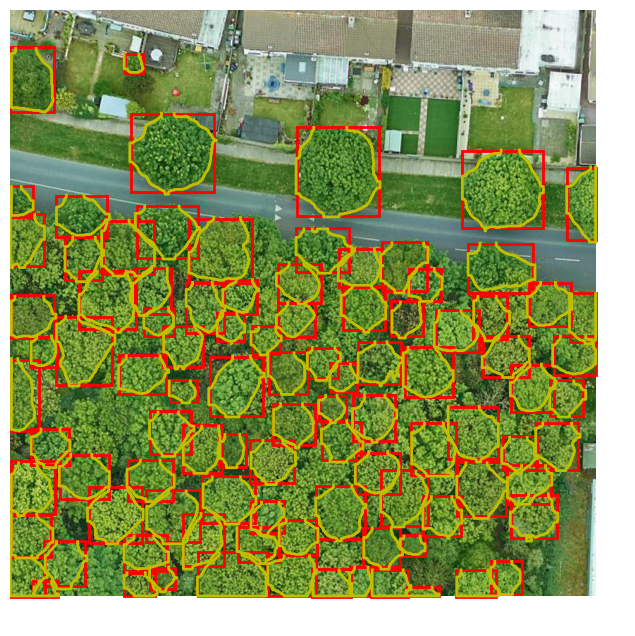

In [34]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
# https://docs.ultralytics.com/usage/cfg/#predict-settings
# Load the custom model
# my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/crumlin_train_150n/weights/best.pt") # crumlin
#my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/crumlin_ucd/train_150/weights/best.pt") # crumlin+ucd
#my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/ID42/yolo8/train_100/weights/best.pt") # 
my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/train_150_bz8/weights/best.pt") # crumlin+ucd

# Predict on an image

# img_path = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/JPEG_801/354_ID53.tif"
img_path = "D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/TIF/685_ID42.tif"
new_results = my_new_model(img_path, conf=0.25, iou=0.25) # iou=0.1

# Load the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a figure for plotting
plt.figure(figsize=(8, 8))
plt.imshow(img)
ax = plt.gca()

# Loop over the detected objects
for result in new_results:
    boxes = result.boxes  # get the bounding boxes
    masks = result.masks  # get the masks if available
    for box in boxes:
        # Extract the coordinates of the bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        
        # Draw the rectangle boundary
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

    if masks is not None:
        for mask in masks.xy:
            mask_polygon = mask  # Already a numpy array
            plt.plot(mask_polygon[:, 0], mask_polygon[:, 1], 'y', linewidth=2)

# Show the plot
plt.axis('off')
plt.show()



In [29]:
# Export as png
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load the custom model
my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/train_150_bz8/weights/best.pt") # crumlin+ucd

# Predict on an image
#img_path = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/TIF_801/332_ID53.tif"
img_path = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/JPEG_801/829_ID53.tif"
new_results = my_new_model(img_path, conf=0.25, iou=0.2)

# Load the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a figure for plotting
plt.figure(figsize=(8, 8))
plt.imshow(img)
ax = plt.gca()

# Loop over the detected objects
for result in new_results:
    boxes = result.boxes  # get the bounding boxes
    masks = result.masks  # get the masks if available
    for box in boxes:
        # Extract the coordinates of the bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        
        # Draw the rectangle boundary
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

    if masks is not None:
        for mask in masks.xy:
            mask_polygon = mask  # Already a numpy array
            plt.plot(mask_polygon[:, 0], mask_polygon[:, 1], 'y', linewidth=2)

# Hide the axes
plt.axis('off')

# Save the plot to a file
output_path = "D:/E/Delet/829_ID53_output_y.png"
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
plt.close()

print(f"Output saved to {output_path}")



image 1/1 D:\E\Postdoc\RGB\Google\RGB\Crumlin\yolo8\data2\JPEG_801\829_ID53.tif: 832x832 36 Trees, 6040.0ms
Speed: 16.0ms preprocess, 6040.0ms inference, 393.1ms postprocess per image at shape (1, 3, 832, 832)
Output saved to D:/E/Delet/829_ID53_output_y.png


# For single file export polygon 

In [50]:
# ----------------------------------------------------------------------------
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
# https://docs.ultralytics.com/usage/cfg/#predict-settings
# Load the custom model
my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/crumlin_ucd/train_150/weights/best.pt")

# my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/crumlin_train_150n/weights/best.pt")
# Predict on an image
# img_path = "D:/E/Postdoc/RGB/Google/RGB/ID54/TIF/807_ID54.tif"

img_path = "D:/E/Postdoc/RGB/Google/RGB//Crumlin/yolo8/TIF/529_ID53c.tif"
new_results = my_new_model(img_path, conf=0.25, iou=0.2) # iou=0.1

# Export polygons as tif layer with stack formate for a single image
import rasterio
from rasterio.crs import CRS
from rasterio.transform import from_origin

mask = new_results[0].masks.data
mask = mask.numpy() * 255

mask_array = np.array(mask)

print(mask_array.shape)

img = rasterio.open("D:/E/Postdoc/RGB/Google/RGB//Crumlin/yolo8/TIF/529_ID53c.tif")

rr = img.read()
dim1 = rr.shape
gt = img.transform
#crs = CRS.from_epsg(3857)
crs = img.crs
crs
transform = gt

dtype = mask.dtype
dtype
#row
height = dim1[1]
height
#col
width = dim1[2]
width
count = mask.shape[0] # number of layers

with rasterio.open("D:/E/Delet/img/mask/529_mask_02x.tif", "w",
                   height=height,
                   width=width,
                   count=count,
                   dtype=dtype,
                   crs=crs,
                   transform=transform) as dst:
    dst.write(mask)


image 1/1 D:\E\Postdoc\RGB\Google\RGB\Crumlin\yolo8\TIF\529_ID53c.tif: 1024x1024 48 tree1s, 9671.5ms
Speed: 31.6ms preprocess, 9671.5ms inference, 848.7ms postprocess per image at shape (1, 3, 1024, 1024)
(48, 1024, 1024)


In [51]:
# Finel version of create poly gon from each layer from stack image and expot combindly for single file extraction
import cv2
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Path to your input TIFF file
tif_file = "D:/E/Delet/img/mask/529_mask_02x.tif"

# Load the TIFF file
with rasterio.open(tif_file) as src:
    layers = src.read()  # Read all layers
    transform = src.transform
    crs = src.crs

# Initialize an empty list to hold all polygons
all_polygons = []

# Function to rectify polygon coordinates
def rectify_polygon(polygon, transform):
    def pixel2coord(x, y, transform):
        return transform * (x, y)

    exterior_coords = [pixel2coord(x, y, transform) for x, y in polygon.exterior.coords]
    interiors_coords = [[pixel2coord(x, y, transform) for x, y in interior.coords] for interior in polygon.interiors]
    return Polygon(exterior_coords, interiors_coords)

# Process each layer separately
for layer in layers:
    # Convert the layer to a binary image
    binary_mask = np.uint8(layer > 127) * 255

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert contours to Shapely polygons and add to the list
    for contour in contours:
        if len(contour) > 2:  # Ignore small or invalid contours
            polygon = Polygon(contour[:, 0, :])
            rectified_polygon = rectify_polygon(polygon, transform)
            all_polygons.append(rectified_polygon)

# Create a GeoDataFrame with the rectified polygons
gdf = gpd.GeoDataFrame({'geometry': all_polygons})

# Set the CRS from the GeoTIFF
gdf.set_crs(crs.to_string(), inplace=True)

# Export the GeoDataFrame to a shapefile
shapefile_path = "D:/E/Delet/img/shp/529_mask_02x.shp"
gdf.to_file(shapefile_path)

In [ ]:
my_new_model = YOLO("D:/E/Postdoc/RGB/Google/RGB/ID42/yolo8/train_100/weights/best.pt")  # load a custom model multiple class
img = ("D:/E/Postdoc/RGB/Google/RGB/ID52/TIF/1781_ID52.tif")  # predict on an image
# img = ("/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/test/524_ID42.jpeg")  # predict on an image
new_results = my_new_model(img, conf=0.25)  #Adjust conf threshold

from matplotlib import pyplot as plt
new_result_array = new_results[0].plot()
plt.figure(figsize=(6, 6))
plt.imshow(new_result_array)

In [ ]:
# Plot shp and tif file combinedly
# Path to your GeoTIFF and shapefile
tif_file = "/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/test/ID53/1596_ID53.tif"
shapefile_path = "/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/test/1596_ID53.shp"

# Open and display the GeoTIFF
with rasterio.open(tif_file) as src:
    fig, ax = plt.subplots(figsize=(5, 5))
    show(src, ax=ax)

    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Plot the shapefile on top of the GeoTIFF
    gdf.plot(ax=ax, facecolor='none', edgecolor='red')

    plt.title("GeoTIFF with Shapefile Overlay")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

In [14]:
import os
from PIL import Image


# Check a few images and labels
train_image_dir = 'D:/E/Postdoc/RGB/Google/RGB/ID43/TIF/'
shp_dir = 'D:/E/Postdoc/RGB/Google/RGB/ID43/pred_ep100_cf25_shp/'
# train_label_dir = '/content/drive/MyDrive/Postdoc_UCD/YOLO/Tree_nontree/data/val/labels'

# Verify that images and labels match
image_files = os.listdir(train_image_dir)
shp_files = os.listdir(shp_dir)

print(f"Number of training images: {len(image_files)}")
print(f"Number of shp: {len(shp_files)}")

Number of training images: 1807
Number of shp: 6230


In [2]:

import os
from PIL import Image


# Check a few images and labels
train_image_dir = r'D:\E\Postdoc\RGB\Google\RGB\Crumlin\yolo8/JPEG'
train_label_dir = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/labels'

# Verify that images and labels match
image_files = os.listdir(train_image_dir)
labels_files = os.listdir(train_label_dir)

print(f"Number of training images: {len(image_files)}")
print(f"Number of training labels: {len(labels_files)}")

Number of training images: 376
Number of training labels: 376


# For multiple file export

In [33]:
import os
import cv2
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
from ultralytics import YOLO  # Ensure you have the ultralytics package installed

# Load the YOLO model
model_path = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/train_150_bz8/weights/best.pt"  # crumlin+ucd
my_new_model = YOLO(model_path)

# Directory paths
#input_dir = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/TIFID52/"
#mask_output_dir = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/TIF_801/pred_tif/"
#shp_output_dir = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/TIF_801/pred_ep150_cf25_iou02_shp/"

input_dir = "D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/TIF"
mask_output_dir = "D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/pred_tif/"
shp_output_dir = "D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/pred_ep150_cf25_iou02_shp/"
# Ensure output directories exist
os.makedirs(mask_output_dir, exist_ok=True)
os.makedirs(shp_output_dir, exist_ok=True)

# List all TIFF files in the input directory
tif_files = [f for f in os.listdir(input_dir) if f.endswith('.tif')]

# Function to rectify polygon coordinates
def rectify_polygon(polygon, transform):
    def pixel2coord(x, y, transform):
        return transform * (x, y)
    
    exterior_coords = [pixel2coord(x, y, transform) for x, y in polygon.exterior.coords]
    interiors_coords = [[pixel2coord(x, y, transform) for x, y in interior.coords] for interior in polygon.interiors]
    return Polygon(exterior_coords, interiors_coords)

# Process each TIFF file for mask extraction and polygon extraction
for tif_file in tif_files:
    img_path = os.path.join(input_dir, tif_file)

    # Predict on the image using YOLO
    new_results = my_new_model(img_path, conf=0.25, iou=0.2)

    if new_results[0].masks is None:
        print(f"No masks found for {tif_file}. Skipping...")
        continue

    mask = new_results[0].masks.data
    mask = mask.cpu().numpy() * 255  # Ensure the mask is on the CPU and convert to numpy

    # Convert mask to numpy array
    mask_array = np.array(mask)

    # Read original image for metadata
    with rasterio.open(img_path) as img:
        rr = img.read()
        dim1 = rr.shape
        gt = img.transform
        crs = img.crs
        transform = gt
        dtype = mask.dtype
        height = dim1[1]
        width = dim1[2]
        count = mask.shape[0]  # number of layers

    # Output file path for mask
    mask_output_file = os.path.join(mask_output_dir, f"{tif_file}")

    # Save mask as new TIFF file
    with rasterio.open(mask_output_file, "w", height=height, width=width, count=count, dtype=dtype, crs=crs, transform=transform) as dst:
        dst.write(mask)

    print(f"Processed and saved mask: {mask_output_file}")

    # Polygon extraction
    combined_polygons = []  # Initialize an empty list to hold all polygons for the current TIFF file

    # Load the saved mask TIFF file
    with rasterio.open(mask_output_file) as src:
        layers = src.read()  # Read all layers
        transform = src.transform
        crs = src.crs  # Save the CRS

    # Process each layer separately
    for layer_index, layer in enumerate(layers):
        # Convert the layer to a binary image
        binary_mask = np.uint8(layer > 127) * 255

        # Find contours in the binary mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to Shapely polygons
        for contour in contours:
            if len(contour) > 2:  # Ignore small or invalid contours
                polygon = Polygon(contour[:, 0, :])
                rectified_polygon = rectify_polygon(polygon, transform)
                combined_polygons.append(rectified_polygon)

    # Create a GeoDataFrame with the combined polygons
    gdf = gpd.GeoDataFrame({'geometry': combined_polygons})

    # Set the CRS from the GeoTIFF
    gdf.set_crs(crs.to_string(), inplace=True)

    # Construct the output shapefile path
    output_shapefile_path = os.path.join(shp_output_dir, f"{os.path.splitext(tif_file)[0]}_combined.shp")

    # Export the GeoDataFrame to a shapefile
    gdf.to_file(output_shapefile_path)

    print(f"Combined polygons from {tif_file} extracted and saved to shapefile: {output_shapefile_path}")

    # Delete the mask file
    os.remove(mask_output_file)
    print(f"Deleted mask file: {mask_output_file}")

print("All TIFF files processed and saved to combined shapefiles.")



image 1/1 D:\E\Postdoc\RGB\Google\RGB\ID42\Tree_species\TIF\1001_ID42.tif: 832x832 5 Trees, 11057.8ms
Speed: 28.9ms preprocess, 11057.8ms inference, 78.8ms postprocess per image at shape (1, 3, 832, 832)
Processed and saved mask: D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/pred_tif/1001_ID42.tif
Combined polygons from 1001_ID42.tif extracted and saved to shapefile: D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/pred_ep150_cf25_iou02_shp/1001_ID42_combined.shp
Deleted mask file: D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/pred_tif/1001_ID42.tif

image 1/1 D:\E\Postdoc\RGB\Google\RGB\ID42\Tree_species\TIF\1002_ID42.tif: 832x832 9 Trees, 11155.6ms
Speed: 23.7ms preprocess, 11155.6ms inference, 125.7ms postprocess per image at shape (1, 3, 832, 832)
Processed and saved mask: D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/pred_tif/1002_ID42.tif
Combined polygons from 1002_ID42.tif extracted and saved to shapefile: D:/E/Postdoc/RGB/Google/RGB/ID42/Tree_species/pred_ep150_cf25_iou02_shp/10

# Merge all shp file into single shp file

In [45]:
import os
import geopandas as gpd
from shutil import copyfile
import pandas as pd  # Import pandas for the concat function

# Input and output directories
input_dir = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/TIF_801/pred_ep150_cf25_iou02_shp/"
final_output_shapefile_path = "D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/pred_ep150_bz_8_cf25_iou02_ID52.shp"

# Input and output directories
# input_dir = "D:/E/Delet/img/shp/"
# final_output_shapefile_path = "D:/E/Delet/img/shp/ID52_crown_ep100cf25_iou_01.shp"

# List all shapefiles in the input directory
shapefiles = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.shp')]

# Check if there are shapefiles to merge
if not shapefiles:
    raise ValueError("No shapefiles found in the input directory.")

# Initialize an empty list to hold all GeoDataFrames
gdfs = []

# Merge all shapefiles into a list of GeoDataFrames
for shp_file in shapefiles:
    gdf = gpd.read_file(shp_file)
    gdfs.append(gdf)

# Concatenate all GeoDataFrames into a single GeoDataFrame
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)

# Save the combined GeoDataFrame to a single shapefile
combined_gdf.to_file(final_output_shapefile_path)

print(f"All individual shapefiles merged and saved to: {final_output_shapefile_path}")


All individual shapefiles merged and saved to: D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/pred_ep150_bz_8_cf25_iou02_ID52.shp


<!-- For individual operations -->

In [ ]:
# create only mask file by loop
import os
import numpy as np
import cv2
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
from rasterio.plot import show
from ultralytics import YOLO
# Load the YOLO model
model_path = "D:/E/Postdoc/RGB/Google/RGB/ID42/yolo8/train_100/weights/best.pt"
my_new_model = YOLO(model_path)

# Directory paths
input_dir = "D:/E/Delet/img/"
output_dir = "D:/E/Delet/img/mask/"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List all TIFF files in the input directory
tif_files = [f for f in os.listdir(input_dir) if f.endswith('.tif')]

for tif_file in tif_files:
    # Input file path
    img_path = os.path.join(input_dir, tif_file)

    # Predict on the image
    new_results = my_new_model(img_path, conf=0.25)

    if new_results[0].masks is None:
        print(f"No masks found for {tif_file}. Skipping...")
        continue

    mask = new_results[0].masks.data
    mask = mask.numpy() * 255

    # Convert mask to numpy array
    mask_array = np.array(mask)

    # Read original image for metadata
    with rasterio.open(img_path) as img:
        rr = img.read()
        dim1 = rr.shape
        gt = img.transform
        crs = img.crs
        transform = gt
        dtype = mask.dtype
        height = dim1[1]
        width = dim1[2]
        count = mask.shape[0]  # number of layers

    # Output file path
    output_file = os.path.join(output_dir, f"{tif_file}")

    # Save mask as new TIFF file
    with rasterio.open(output_file, "w", height=height, width=width, count=count, dtype=dtype, crs=crs, transform=transform) as dst:
        dst.write(mask)

    print(f"Processed and saved: {output_file}")

In [ ]:
# create only shpe  file from mask by loop
import os
import cv2
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
# Input and output directories
input_dir = "D:/E/Delet/img/mask/"
output_dir = "D:/E/Delet/img/shp/"

os.makedirs(output_dir, exist_ok=True)

# List all processed TIFF files in the input directory
processed_tif_files = [f for f in os.listdir(input_dir) if f.endswith('.tif')]

# Function to rectify polygon coordinates
def rectify_polygon(polygon, transform):
    def pixel2coord(x, y, transform):
        return transform * (x, y)

    exterior_coords = [pixel2coord(x, y, transform) for x, y in polygon.exterior.coords]
    interiors_coords = [[pixel2coord(x, y, transform) for x, y in interior.coords] for interior in polygon.interiors]
    return Polygon(exterior_coords, interiors_coords)

# Process each TIFF file
for tif_file in processed_tif_files:
    tif_path = os.path.join(input_dir, tif_file)
    combined_polygons = []  # Initialize an empty list to hold all polygons for the current TIFF file

    # Load the TIFF file
    with rasterio.open(tif_path) as src:
        layers = src.read()  # Read all layers
        transform = src.transform
        crs = src.crs  # Save the CRS

    # Process each layer separately
    for layer_index, layer in enumerate(layers):
        # Convert the layer to a binary image
        binary_mask = np.uint8(layer > 127) * 255

        # Find contours in the binary mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to Shapely polygons
        for contour in contours:
            if len(contour) > 2:  # Ignore small or invalid contours
                polygon = Polygon(contour[:, 0, :])
                rectified_polygon = rectify_polygon(polygon, transform)
                combined_polygons.append(rectified_polygon)

    # Create a GeoDataFrame with the combined polygons
    gdf = gpd.GeoDataFrame({'geometry': combined_polygons})

    # Set the CRS from the GeoTIFF
    gdf.set_crs(crs.to_string(), inplace=True)

    # Construct the output shapefile path
    output_shapefile_path = os.path.join(output_dir, f"{os.path.splitext(tif_file)[0]}_combined.shp")

    # Export the GeoDataFrame to a shapefile
    gdf.to_file(output_shapefile_path)

    print(f"Combined polygons from {tif_file} extracted and saved to shapefile: {output_shapefile_path}")

print("All TIFF files processed and saved to combined shapefiles.")

In [ ]:
# predict inro mask tif file and create shp file from mask layer without delete
import os
import cv2
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
from ultralytics import YOLO  # Ensure you have the ultralytics package installed

# Load the YOLO model
model_path = "D:/E/Postdoc/RGB/Google/RGB/ID42/yolo8/train_100/weights/best.pt"
my_new_model = YOLO(model_path)

# Directory paths
input_dir = "D:/E/Delet/img/"
mask_output_dir = "D:/E/Delet/img/mask/"
shp_output_dir = "D:/E/Delet/img/shp/"

# Ensure output directories exist
os.makedirs(mask_output_dir, exist_ok=True)
os.makedirs(shp_output_dir, exist_ok=True)

# List all TIFF files in the input directory
tif_files = [f for f in os.listdir(input_dir) if f.endswith('.tif')]

# Function to rectify polygon coordinates
def rectify_polygon(polygon, transform):
    def pixel2coord(x, y, transform):
        return transform * (x, y)
    
    exterior_coords = [pixel2coord(x, y, transform) for x, y in polygon.exterior.coords]
    interiors_coords = [[pixel2coord(x, y, transform) for x, y in interior.coords] for interior in polygon.interiors]
    return Polygon(exterior_coords, interiors_coords)

# Process each TIFF file for mask extraction and polygon extraction
for tif_file in tif_files:
    img_path = os.path.join(input_dir, tif_file)

    # Predict on the image using YOLO
    new_results = my_new_model(img_path, conf=0.25)

    if new_results[0].masks is None:
        print(f"No masks found for {tif_file}. Skipping...")
        continue

    mask = new_results[0].masks.data
    mask = mask.numpy() * 255

    # Convert mask to numpy array
    mask_array = np.array(mask)

    # Read original image for metadata
    with rasterio.open(img_path) as img:
        rr = img.read()
        dim1 = rr.shape
        gt = img.transform
        crs = img.crs
        transform = gt
        dtype = mask.dtype
        height = dim1[1]
        width = dim1[2]
        count = mask.shape[0]  # number of layers

    # Output file path for mask
    mask_output_file = os.path.join(mask_output_dir, f"{tif_file}")

    # Save mask as new TIFF file
    with rasterio.open(mask_output_file, "w", height=height, width=width, count=count, dtype=dtype, crs=crs, transform=transform) as dst:
        dst.write(mask)

    print(f"Processed and saved mask: {mask_output_file}")

    # Polygon extraction
    combined_polygons = []  # Initialize an empty list to hold all polygons for the current TIFF file

    # Load the saved mask TIFF file
    with rasterio.open(mask_output_file) as src:
        layers = src.read()  # Read all layers
        transform = src.transform
        crs = src.crs  # Save the CRS

    # Process each layer separately
    for layer_index, layer in enumerate(layers):
        # Convert the layer to a binary image
        binary_mask = np.uint8(layer > 127) * 255

        # Find contours in the binary mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to Shapely polygons
        for contour in contours:
            if len(contour) > 2:  # Ignore small or invalid contours
                polygon = Polygon(contour[:, 0, :])
                rectified_polygon = rectify_polygon(polygon, transform)
                combined_polygons.append(rectified_polygon)

    # Create a GeoDataFrame with the combined polygons
    gdf = gpd.GeoDataFrame({'geometry': combined_polygons})

    # Set the CRS from the GeoTIFF
    gdf.set_crs(crs.to_string(), inplace=True)

    # Construct the output shapefile path
    output_shapefile_path = os.path.join(shp_output_dir, f"{os.path.splitext(tif_file)[0]}_combined.shp")

    # Export the GeoDataFrame to a shapefile
    gdf.to_file(output_shapefile_path)

    print(f"Combined polygons from {tif_file} extracted and saved to shapefile: {output_shapefile_path}")

print("All TIFF files processed and saved to combined shapefiles.")


# For single file export


image 1/1 D:\E\Delet\img\D12_18_SE101.tif: 832x832 28 Trees, 2743.1ms
Speed: 30.7ms preprocess, 2743.1ms inference, 312.5ms postprocess per image at shape (1, 3, 832, 832)


(28, 832, 832)


# IOU calculation

In [1]:
# Import necessary libraries
import geopandas as gpd
from shapely.geometry import Polygon

In [6]:
# Function to calculate IoU
def calculate_iou(poly1, poly2):
    intersection = poly1.intersection(poly2).area
    union = poly1.union(poly2).area
    iou = intersection / union
    return iou

# Step 2: Load the shapefiles
shapefile1_path = 'D:/E/Delet/IOU/yolo.shp'
shapefile2_path = 'D:/E/Delet/IOU/ground.shp'

gdf1 = gpd.read_file(shapefile1_path)
gdf2 = gpd.read_file(shapefile2_path)

# Assuming there's only one polygon in each shapefile
# If there are multiple polygons, you may need to iterate over them
poly1 = gdf1.geometry.iloc[0]
poly2 = gdf2.geometry.iloc[0]

# Step 3 & 4: Calculate IoU
iou_value = calculate_iou(poly1, poly2)
print(f'IoU Value: {iou_value}')

IoU Value: 0.9391859337229764


In [1]:
# For multiple polygons
import geopandas as gpd
from shapely.geometry import Polygon

# Function to calculate IoU
def calculate_iou(poly1, poly2):
    intersection = poly1.intersection(poly2).area
    union = poly1.union(poly2).area
    iou = intersection / union
    return iou

# Step 2: Load the shapefiles
A1_yolo8 = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/Validation/A1_tree_yolo8.shp'
A1_manual = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/Validation/A1_tree_Manual_clip.shp'

gdf1 = gpd.read_file(A1_yolo8)
gdf2 = gpd.read_file(A1_manual)

# Step 3: Calculate IoU for all pairs of polygons and find max IoU for each polygon in shapefile1
iou_max_values = []

for i, poly1 in gdf1.iterrows():
    max_iou = 0
    for j, poly2 in gdf2.iterrows():
        iou_value = calculate_iou(poly1.geometry, poly2.geometry)
        if iou_value > max_iou:
            max_iou = iou_value
    iou_max_values.append(max_iou)

# Step 4: Add IoU values as a new column in the first GeoDataFrame
gdf1['IoU'] = iou_max_values

# Step 5: Export the updated GeoDataFrame to a new shapefile
output_shapefile_path = 'D:/E/Delet/IOU/A1_yolo_with_iou.shp'
gdf1.to_file(output_shapefile_path)

print(f'Updated shapefile with IoU values has been saved to: {output_shapefile_path}')

Updated shapefile with IoU values has been saved to: D:/E/Delet/IOU/A1_yolo_with_iou.shp


# IOU value with area export from both shp 

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

# Function to calculate IoU
def calculate_iou(poly1, poly2):
    intersection = poly1.intersection(poly2).area
    union = poly1.union(poly2).area
    iou = intersection / union
    return iou

# Step 2: Load the shapefiles
A1_yolo8 = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/Crumlin_ep150_bz_8_cf25_iou02_max_tree_height.shp'
A1_manual = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/shp/Crown_blusky.shp'

gdf1 = gpd.read_file(A1_yolo8)
gdf2 = gpd.read_file(A1_manual)

# Step 3: Calculate IoU for all pairs of polygons and find max IoU for each polygon in shapefile1
iou_max_values = []
matching_manual_indices = []
for i, poly1 in gdf1.iterrows():
    max_iou = 0
    max_index = -1
    for j, poly2 in gdf2.iterrows():
        iou_value = calculate_iou(poly1.geometry, poly2.geometry)
        if iou_value > max_iou:
            max_iou = iou_value
            max_index = j
    iou_max_values.append(max_iou)
    matching_manual_indices.append(max_index)

# Step 4: Add IoU values and matching gdf2 columns as new columns in the first GeoDataFrame
gdf1['IoU'] = iou_max_values

# Add columns from gdf2
for column in gdf2.columns:
    if column != 'geometry':  # Skip the geometry column
        gdf1[column] = [gdf2.at[idx, column] if idx != -1 else None for idx in matching_manual_indices]

# Step 5: Export the updated GeoDataFrame to a new shapefile
output_shapefile_path = 'D:/E/Delet/Crumlin_yolo_vs_Blusky_iou_and_area_.shp'
gdf1.to_file(output_shapefile_path)

print(f'Updated shapefile with IoU values and manual columns has been saved to: {output_shapefile_path}')


In [6]:
# export in sq meters
import geopandas as gpd
from shapely.geometry import Polygon

# Function to calculate IoU
def calculate_iou(poly1, poly2):
    intersection = poly1.intersection(poly2).area
    union = poly1.union(poly2).area
    iou = intersection / union
    return iou

# Step 2: Load the shapefiles
A1_yolo8 = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/Validation/C1/C1_tree_yolo8.shp'
A1_manual = 'D:/E/Postdoc/RGB/Google/RGB/Crumlin/yolo8/data2/Validation/C1/C1_tree_Manual_clip.shp'

gdf1 = gpd.read_file(A1_yolo8)
gdf2 = gpd.read_file(A1_manual)

# Print CRS information
print(f"Original CRS of gdf1: {gdf1.crs}")
print(f"Original CRS of gdf2: {gdf2.crs}")

# Step 3: Ensure the GeoDataFrames are in the same projected coordinate system for area calculations
target_crs = 'EPSG:32633'  # Example: UTM zone 33N, replace with your relevant CRS

# Transform CRS if necessary
if gdf1.crs != target_crs:
    gdf1 = gdf1.to_crs(target_crs)
    print(f"Transformed CRS of gdf1: {gdf1.crs}")

if gdf2.crs != target_crs:
    gdf2 = gdf2.to_crs(target_crs)
    print(f"Transformed CRS of gdf2: {gdf2.crs}")

# Step 4: Calculate IoU for all pairs of polygons and find max IoU for each polygon in shapefile1
iou_max_values = []
matching_gdf2_areas = []
matching_gdf1_areas = []
for i, poly1 in gdf1.iterrows():
    max_iou = 0
    manual_area = 0
    yolo_area = poly1.geometry.area  # Calculate area in square meters
    for j, poly2 in gdf2.iterrows():
        iou_value = calculate_iou(poly1.geometry, poly2.geometry)
        if iou_value > max_iou:
            max_iou = iou_value
            manual_area = poly2.geometry.area  # Calculate area in square meters
    iou_max_values.append(max_iou)
    matching_gdf2_areas.append(manual_area)
    matching_gdf1_areas.append(yolo_area)

# Step 5: Add IoU values and matching gdf2 areas as new columns in the first GeoDataFrame
gdf1['Manual_Area_sqm'] = matching_gdf2_areas
gdf1['yolo8_Area_sqm'] = matching_gdf1_areas
gdf1['IoU'] = iou_max_values

# Step 6: Reproject to the original CRS if needed
original_crs = gpd.read_file(A1_yolo8).crs
gdf1 = gdf1.to_crs(original_crs)

# Step 7: Export the updated GeoDataFrame to a new shapefile
output_shapefile_path = 'D:/E/Delet/C1_yolo_with_iou_and_area_2.shp'
gdf1.to_file(output_shapefile_path)

print(f'Updated shapefile with IoU values and areas has been saved to: {output_shapefile_path}')


Original CRS of gdf1: EPSG:3857
Original CRS of gdf2: EPSG:3857
Transformed CRS of gdf1: EPSG:32633
Transformed CRS of gdf2: EPSG:32633
Updated shapefile with IoU values and areas has been saved to: D:/E/Delet/C1_yolo_with_iou_and_area_2.shp


C:\Users\maiti\AppData\Local\Temp\ipykernel_532\1545386799.py:63: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf1.to_file(output_shapefile_path)
